[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/zhimingkuang/Harvard-AM-115/blob/main/02_numerics/single_pendulum.ipynb)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
# Define ODE for the single pendulum problem
F = lambda t,y: [y[1], -np.sin(y[0])]

First, we look at small angle.

In [3]:
# Solve ODE with RK45 at small angle
sol = solve_ivp(F, [0,4*np.pi], [0.1,0], t_eval=np.linspace(0,4*np.pi,50))
# Unpack solution
t, y = sol.t, sol.y # note that two numpy.ndarray are stacked in y = [theta, dtheta]

In [4]:
# Customize for matplotlib
# If interested in the matplotlib object hierarchy, check: https://realpython.com/python-matplotlib-guide/
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['mathtext.default'] = 'regular'
# Change font size: http://www.futurile.net/2016/02/27/matplotlib-beautiful-plots-with-style/
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['figure.titlesize'] = 20

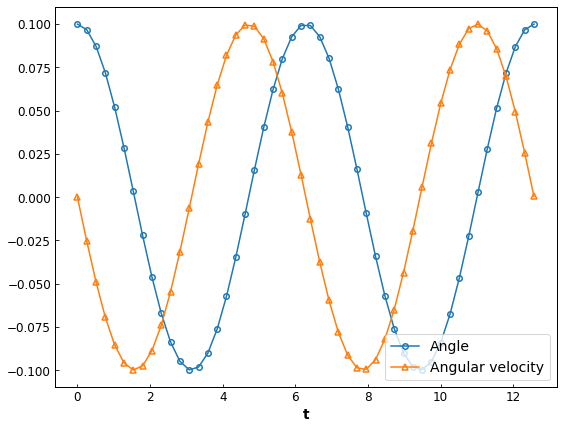

In [5]:
# Plot solution at small angle
fig, ax = plt.subplots(1,1,figsize=(9,7))

# Plot solutions
ax.plot(t, y[0,:], '-o', linewidth=1.5, mfc='none', ms=5.5, mew=1.5, label='Angle')
ax.plot(t, y[1,:], '-^', linewidth=1.5, mfc='none', ms=5.5, mew=1.5, label='Angular velocity')


# Set axes labels
ax.set_xlabel(r'$t$')
plt.legend(loc='lower right')

plt.show()

Next, we look at larger angle and see how numerical errors affect the solutions. Note that the solutions can be different depending on your choice of `rtol`.

In [6]:
# Solve ODE with RK45 at large angle
sol = solve_ivp(F, [0,20*np.pi], [np.pi-0.1,0], t_eval=np.linspace(0,20*np.pi,50), rtol=0.9e-3)
# Unpack solution
t, y = sol.t, sol.y # note that two numpy.ndarray are stacked in y = [theta, dtheta]

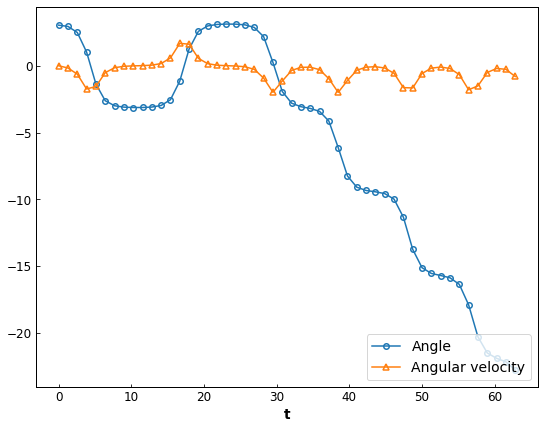

In [7]:
# Plot solution at large angle with large relative tolerance
fig, ax = plt.subplots(1,1,figsize=(9,7))

# Plot solutions
ax.plot(t, y[0,:], '-o', linewidth=1.5, mfc='none', ms=5.5, mew=1.5, label='Angle')
ax.plot(t, y[1,:], '-^', linewidth=1.5, mfc='none', ms=5.5, mew=1.5, label='Angular velocity')


# Set axes labels
ax.set_xlabel(r'$t$')
plt.legend(loc='lower right')

plt.show()

Now we decrease `rtol` to see if we can get a better numerical solution. Also increase `t_eval` intervals to get a smoother result.

In [8]:
# Solve ODE with RK45 at large angle
sol = solve_ivp(F, [0,20*np.pi], [np.pi-0.1,0], t_eval=np.linspace(0,20*np.pi,100), rtol=1e-5)
# Unpack solution
t, y = sol.t, sol.y # note that two numpy.ndarray are stacked in y = [theta, dtheta]

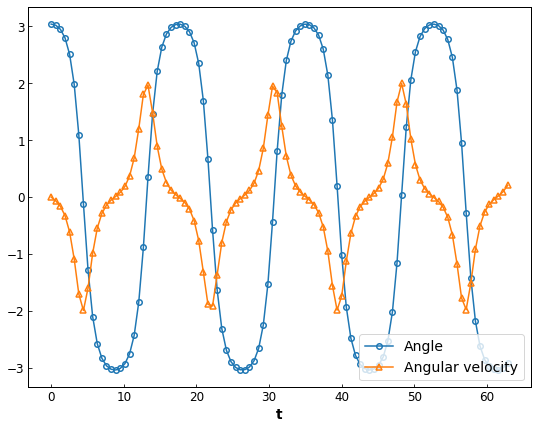

In [9]:
# Plot solution at large angle with small relative tolerance
fig, ax = plt.subplots(1,1,figsize=(9,7))

# Plot solutions
ax.plot(t, y[0,:], '-o', linewidth=1.5, mfc='none', ms=5.5, mew=1.5, label='Angle')
ax.plot(t, y[1,:], '-^', linewidth=1.5, mfc='none', ms=5.5, mew=1.5, label='Angular velocity')


# Set axes labels
ax.set_xlabel(r'$t$')
plt.legend(loc='lower right')

plt.show()

We can also use the custom written `ode45` in Python to integrate ODE.

In [10]:
from scipy.integrate import ode

In [11]:
# Creating a function equivalent to ode45 in Matlab
def ode45(f, tint, y0, rtol=1e-9):
    """Python implementation of MATLAB ode45

    Args:
        f (function): differential equation to solve
        tint (list): time interval endpoints
        y0 (list): initial condition
        rtol (float): relative tolerance

    Returns:
        tt (list): time intervel
        rr (list): array of solutions (theta, dtheta)
        
    """
    
    r = ode(f).set_integrator('zvode', method='bdf',rtol=rtol)
    r.set_initial_value(y0, tint[0])
    dt = (tint[1]-tint[0])/100
    t1 = tint[1]
    tt = []
    rr = []
    while r.successful() and r.t < t1:
        tt.append(r.t+dt)
        rr.append(np.real(r.integrate(r.t+dt)))
        
    return tt, rr

In [12]:
# Define ODE for the single pendulum problem
F = lambda t,y: [y[1], -np.sin(y[0])]
# Solve ODE with custom ode45 at small angle
t_small, y_small = ode45(F, [0,4*np.pi], [0.1,0])
y_small = np.array(y_small)
# Solve ODE with custom ode45 at large angle and large rtol
t_large_large, y_large_large = ode45(F, [0,20*np.pi], [np.pi-0.1,0], rtol=1e-4)
y_large_large = np.array(y_large_large)
# Solve ODE with custom ode45 at large angle and small rtol
t_large_small, y_large_small = ode45(F, [0,20*np.pi], [np.pi-0.1,0], rtol=1.e-5)
y_large_small = np.array(y_large_small)

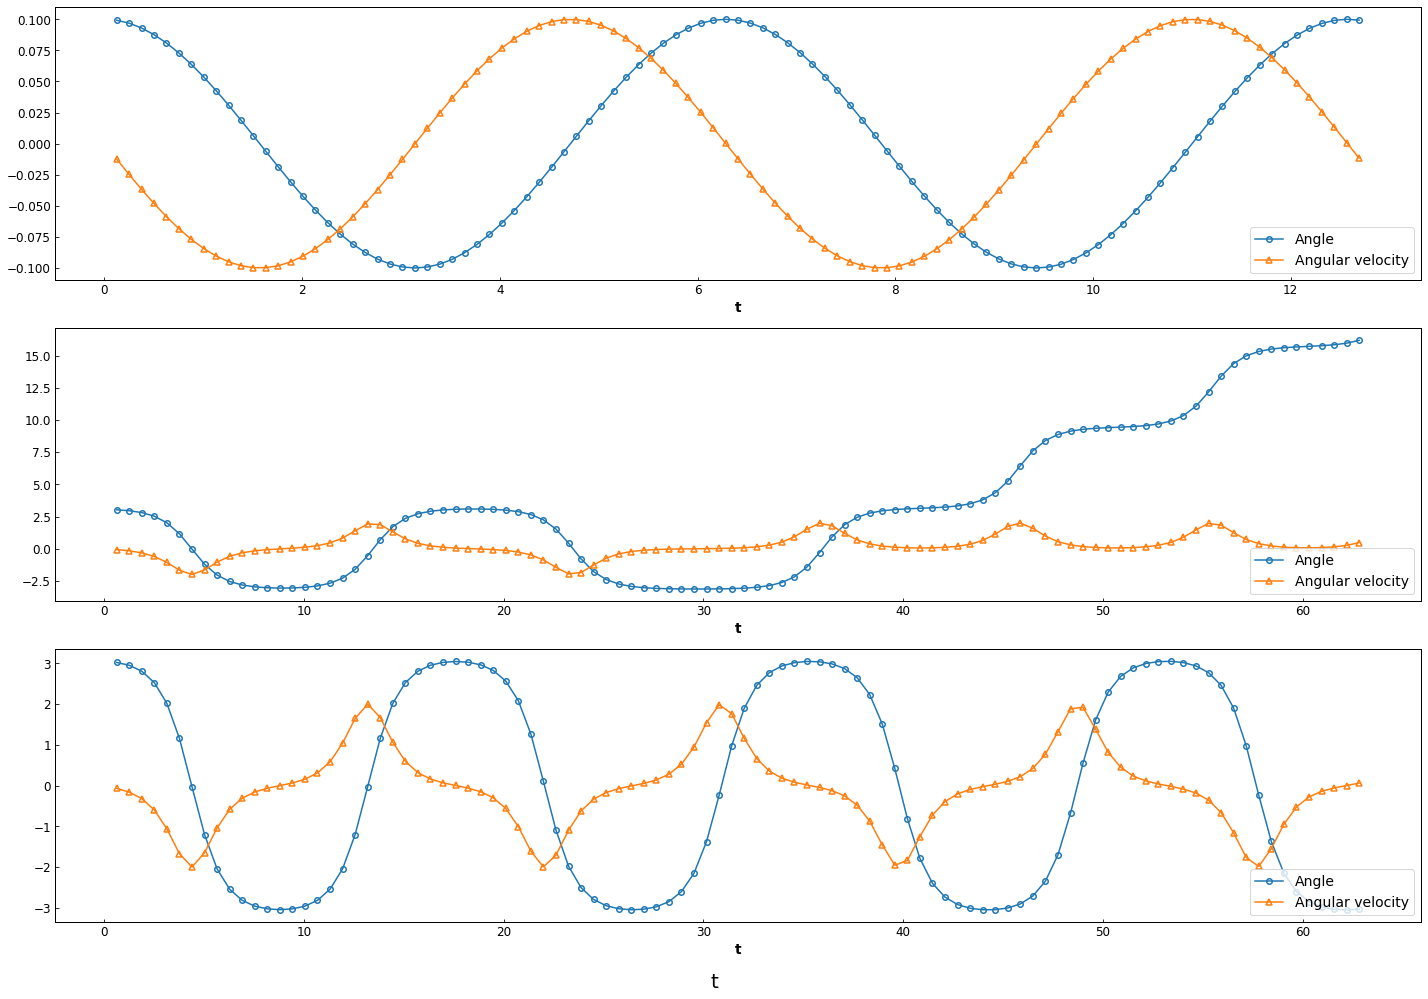

In [13]:
# Plot solutions
fig, axs = plt.subplots(3,1,figsize=(20,14))

# Small angle solution
axs[0].plot(t_small, y_small[:,0], '-o', linewidth=1.5, mfc='none', ms=5.5, mew=1.5, label='Angle')
axs[0].plot(t_small, y_small[:,1], '-^', linewidth=1.5, mfc='none', ms=5.5, mew=1.5, label='Angular velocity')
axs[0].set_xlabel(r'$t$')
axs[0].legend(loc='lower right')
# Large angle and large rtol solution
axs[1].plot(t_large_large, y_large_large[:,0], '-o', linewidth=1.5, mfc='none', ms=5.5, mew=1.5, label='Angle')
axs[1].plot(t_large_large, y_large_large[:,1], '-^', linewidth=1.5, mfc='none', ms=5.5, mew=1.5, label='Angular velocity')
axs[1].set_xlabel(r'$t$')
axs[1].legend(loc='lower right')
# Large angle and small rtol solution
axs[2].plot(t_large_small, y_large_small[:,0], '-o', linewidth=1.5, mfc='none', ms=5.5, mew=1.5, label='Angle')
axs[2].plot(t_large_small, y_large_small[:,1], '-^', linewidth=1.5, mfc='none', ms=5.5, mew=1.5, label='Angular velocity')
axs[2].set_xlabel(r'$t$')
axs[2].legend(loc='lower right')

fig.tight_layout()
plt.show()